## An LSTM Recurrent Neural Network to capture downward or upward trend in google stock prices.

## PART 1 - DATA PREPROCESSING

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Training Set as a dataFrame

In [3]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

# Conversion to 2D - Numpy array is mandatory.
training_set = dataset_train.iloc[:, 1:2].values

training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling - Better to apply Normalization in RNNs

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Create a Data Structure with 60 Time Steps and 1 Output

In [5]:
X_train = list()
y_train = list()
for i in range(60, 1258):
    # Append previous 60 stock prices
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [7]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshape X_train to add dimension to a numpy array

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## PART 2 - BUILDING THE STACKED LSTM - RNN

### Import the Keras Libraries

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN - regressor because we are predicting continuous values

In [10]:
regressor = Sequential()

### Add LSTM Layer

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

### Dropout regularisation is applied to avoid overfitting - rate at neurons you want to drop in the regularisation (20 %)

In [12]:
regressor.add(Dropout(0.2))

### For the following layers, no need to add input_shape parameter.

### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth and final LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units = 1))

### Compiling the LSTM Stacked - RNN

In [17]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### Fitting the RNN to the Training Set

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 75s 123ms/step - loss: 0.1317
Epoch 2/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0066
Epoch 6/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0044 0s - loss: 0.00
Epoch 12/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0

38/38 [==============================] - 6s 155ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0018


## PART 3 - MAKE PREDICTIONS AND VISUALIZING THE RESULT

### Importing the Test Set as a dataFrame

In [19]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

# Conversion to 2D - Numpy array is mandatory.
real_stock_price = dataset_test.iloc[:, 1:2].values

print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [20]:
# Axis = 0 -> Vertical Concatenation
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

print(inputs)

[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97

In [21]:
X_test = list()
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


### Predicted stock price

In [22]:
predicted_stock_price = regressor.predict(X_test)

print(predicted_stock_price)

[[0.9352591 ]
 [0.93138087]
 [0.930145  ]
 [0.93108547]
 [0.93533576]
 [0.9439553 ]
 [0.95399904]
 [0.96126175]
 [0.9651208 ]
 [0.9663485 ]
 [0.9659859 ]
 [0.96475136]
 [0.9633249 ]
 [0.96282065]
 [0.96341634]
 [0.9687816 ]
 [0.9788277 ]
 [0.9917593 ]
 [1.0023626 ]
 [1.0027791 ]]


### Inverse transform the stock prices

In [23]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(predicted_stock_price)

[[781.87787]
 [779.7931 ]
 [779.1287 ]
 [779.6343 ]
 [781.91907]
 [786.5526 ]
 [791.9517 ]
 [795.85583]
 [797.9303 ]
 [798.5903 ]
 [798.3953 ]
 [797.7317 ]
 [796.9649 ]
 [796.69385]
 [797.01404]
 [799.8982 ]
 [805.2986 ]
 [812.2501 ]
 [817.95   ]
 [818.17395]]


### Visualising the results

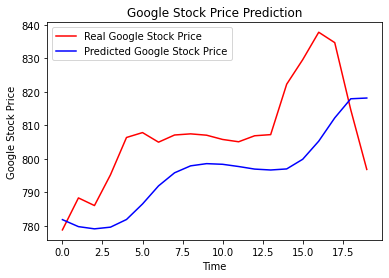

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# EVALUATING THE RNN

The RNN we built was a regressor. Indeed, we were dealing with Regression because we were trying to predict a continuous
outcome (the Google Stock Price). For Regression, the way to evaluate the model performance is with a metric called RMSE
(Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the
real values.

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since
we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real 
stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care
whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite
direction from the real stock price.

In [25]:
# The code that computes the RMSE for our Stock Price Prediction problem is - 

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

# Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 (that is around 800) to get a
# relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this 
# error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values 
# ranged around 10000.

# IMPROVING THE RNN
1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better 
    to train it on the past 10 years.
2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict 
    the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase 
    the number of timesteps, by choosing for example 120 timesteps (6 months).
3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be 
    correlated to the one of Google, you could add this other stock price as a new indicator in the training data.
4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.
5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers
    to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. 
    You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.